# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Belén Ordenes
- Nombre de alumno 2: Javiera Donoso

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/javieradonoso/Repositorio-MDS7202/tree/main)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

*Escriba su respuesta aquí*

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://i.ibb.co/61L8z0w/renacin-by-volframio-dcirf4l-fullview.jpg"
" width="400">
</p>



Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [93]:
#Librerías utilizadas
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier



In [94]:
df = pd.read_csv("stats_players.csv")
df

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [95]:
# Pregunta 1
df['label'] = df['National_Position'].notna().astype(int)

In [96]:
#Pregunta 2
print(df['label'].value_counts())

label
0    16513
1     1075
Name: count, dtype: int64


Dada la generación binaria, se observa que hay 16.513 jugadores no seleccionados para jugar a su país, mientras que se tienen 1075 que sí juegan con su selección. Esto claramente es un problema de desbalance de clases.

In [97]:
df.drop(columns=['National_Position'])

,Name,Nationality,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,Skill_Moves,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,label
0,Cristiano Ronaldo,Portugal,LW,185,80,Right,32,High / Low,4,5,...,95,85,92,93,90,81,76,85,88,1
1,Lionel Messi,Argentina,RW,170,72,Left,29,Medium / Medium,4,4,...,68,71,85,95,88,89,90,74,85,1
2,Neymar,Brazil,LW,174,68,Right,25,High / Medium,5,5,...,61,62,78,89,77,79,84,81,83,1
3,Luis Suárez,Uruguay,ST,182,85,Right,30,High / Medium,4,4,...,69,77,87,94,86,86,84,85,88,1
4,Manuel Neuer,Germany,GK,193,92,Right,31,Medium / Medium,4,1,...,78,25,25,13,16,14,11,47,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,Sub,183,82,Right,19,Medium / Medium,1,1,...,56,14,16,13,13,11,13,15,12,0
17584,Dylan McGoey,Republic of Ireland,Sub,185,80,Right,19,Medium / Medium,2,1,...,53,12,17,12,11,12,13,16,12,0
17585,Tommy Ouldridge,England,Res,173,61,Right,18,High / Medium,2,2,...,61,41,44,28,42,35,36,42,37,0
17586,Mark Foden,Scotland,Sub,180,80,Right,21,Medium / Medium,3,1,...,48,15,23,14,12,13,12,24,12,0


In [98]:
# Pregunta 3
all_columns = df.columns.drop(['Name', 'label', 'National_Position'])
numeric_columns = df[all_columns].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df[all_columns].select_dtypes(include=['object']).columns.tolist()

col_transformer = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numeric_columns),   
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns) 
])

**Pregunta 4**

Para las variables numéricas (altura, peso y edad) se utilizó StandardScaler, utilizamos estas variables dada su magnitud que se encuentran en distintas escalas. Por otro lado, se utiliza la variable 'Club_Position' la cual es categórica y Preffered_Foot que es binaria y se le aplica OneHotEncoder para poder entregarle a los modelos los datos de manera numérica, ya que no es posible que trabajen con datos categóricos.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [99]:
# Separar características
X = df.drop(columns=['Name', 'label', 'National_Position'])
y = df['label']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Definir el pipeline para XGBoost
pipeline_xgboost = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Definir el pipeline para LightGBM
pipeline_lightgbm = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', LGBMClassifier())
])

# Entrenar los pipelines
pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 752, number of negative: 11559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2642
[LightGBM] [Info] Number of data points in the train set: 12311, number of used features: 140
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061084 -> initscore=-2.732483
[LightGBM] [Info] Start training from score -2.732483


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  MinMaxScaler(clip=False,
                                                               copy=True,
                                                               feature_range=(0,
                                                                              1)),
                                                  ['Height', 'Weight', 'Age',
                                                   'Weak_foot', 'Skill_Moves',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', '...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100,
                                n_jobs=None, num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [100]:
# Pregunta 1
y_pred_xgboost = pipeline_xgboost.predict(X_test)
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)

# Calcular el classification report para XGBoost
report_xgboost = classification_report(y_test, y_pred_xgboost, target_names=['0', '1'])
# Calcular el classification report para LightGBM
report_lightgbm = classification_report(y_test, y_pred_lightgbm, target_names=['0', '1'])

#Calcular las métricas para la clase positiva de XGBoost
print("Métricas para XGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgboost):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred_xgboost):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_xgboost):.2f}")
#Ahora su classification report 
print("XGBoost Classification Report:\n", report_xgboost)

#Calculas las métricas para la clase positiva de LightGBM
print("Métricas para LightGBM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lightgbm):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred_lightgbm):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_lightgbm):.2f}")
#Ahora su classification report
print("LightGBM Classification Report:\n", report_lightgbm)

Métricas para XGBoost:
Accuracy: 0.95
Precisión: 0.68
Recall: 0.36
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      4954
           1       0.68      0.36      0.47       323

    accuracy                           0.95      5277
   macro avg       0.82      0.67      0.72      5277
weighted avg       0.94      0.95      0.94      5277

Métricas para LightGBM:
Accuracy: 0.95
Precisión: 0.69
Recall: 0.33
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      4954
           1       0.69      0.33      0.45       323

    accuracy                           0.95      5277
   macro avg       0.82      0.66      0.71      5277
weighted avg       0.94      0.95      0.94      5277



**Pregunta 2**

- Accuracy: Son las predicciones correctas sobre el total de las predicciones. Se usa para saber que tan exacto es el modelo en general. Ambos modelos tienen una exactitud muy alta (0.96), se podría decir que el modelo clasifica correctamente la mayoría de los casos. Sin embargo, dentro de los datos este valor está sesgado por el gran desbalance en las clases, ya que la mayoría de los datos pertenecen a la clase “No Seleccionado”.

- Precisión: Es la proporción de predicciones correctas sobre el total de clasificados positivos. En el caso de XGBoost, la precisión para la clase 1 es medianamente baja (0.68), lo que significa que de todas las veces que el modelo predijo que un jugador sería seleccionado, solo el 68% de las predicciones fueron correctas. Para LightGBM, se tiene una precisión de la clase 1 son 0.69, lo que sugiere que el modelo logra identificar con un 69% el jugador como seleccionado. 

- Recall: Parecido al precision pero este es la proporción de predicciones correctas sobre el total de los que deberían haber sido clasificados como positivos. El recall  para XGBoost es muy bajo (0.36), lo que indica que solo el 36% de los jugadores que realmente fueron seleccionados fueron identificados correctamente. Esto implica que el modelo no está logrando identificar correctamente a los jugadores seleccionados. Para LightGBM, se tiene un recall de la clase 1 son 0.33, lo cual indica que el modelo  identifica con un 33% de manera correcta a los jugadores seleccionados.


La Influencia de la cantidad de ejemplos por clase influye bastante ya que la clase 0  tiene una cantidad significativamente mayor de ejemplos (4954) en comparación con la clase 1 (323). Este desequilibrio de clases es probablemente la razón principal por la cual los modelos tienen un mal desempeño en la clase 1. El modelo está “aprendiendo” a predecir la clase mayoritaria (clase 0) correctamente para maximizar la exactitud, pero no logra generalizar bien para la clase minoritaria. Los modelos tienden a preferir la predicción de la clase mayoritaria, ya que esto les proporciona una mayor exactitud general, aunque a costa de ignorar la clase minoritaria.


**Pregunta 3**

En este contexto, la métrica más adecuada es el recall de la clase positiva, ya que estamos interesados en identificar correctamente a los jugadores que han sido seleccionados. El recall mide la proporción de verdaderos positivos que el modelo es capaz de detectar, y en un escenario como este, donde la clase 1 es mucho menos frecuente, es crucial no dejar escapar jugadores que realmente deberían ser seleccionados. Sin embargo, en este caso, tanto el recall como la precisión para la clase positiva son extremadamente bajos, lo que indica un rendimiento pobre en ambas métricas para la clase 1.

Aunque ambos modelos muestran un desempeño pobre en la identificación de la clase 1, XGBoost tiene un leve mejor desempeño en la clase positiva en comparación con LightGBM. A pesar de que XGBoost tiene un recall mejor, sigue siendo preferible frente a LightGBM, que predice con un 33%. Por tanto, XGBoost es el mejor modelo en este caso, aunque los resultados sugieren que se debe mejorar el manejo del desbalance de clases, posiblemente con técnicas como sobremuestreo, submuestreo, o ajuste de los pesos de clase.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [101]:
#Pregunta 1
# Definimos los grupos de posiciones
groups = {
    'ataque': ['ST', 'CF'],
    'central_ataque': ['RW', 'CAM', 'LW'],
    'central': ['RM', 'CM', 'LM'],
    'central_defensa': ['RWB', 'CDM', 'LWB'],
    'defensa': ['RB', 'CB', 'LB'],
    'arquero': ['GK']
}

# Crear una función para etiquetar las posiciones
def label_position(club_position):
    for label, positions in groups.items():
        if club_position in positions:
            return label
    return None  # Para valores que no entran en los grupos

# Aplicamos la función a una copia de df 
df_1 = df.copy()

df_1['label'] = df_1['Club_Position'].apply(label_position)

# Filtrar los valores no deseados ('Sub', 'Res')
df_filtered = df_1[df_1['label'].notna()]
#Pregunta 2
# Contar cuántos jugadores hay en cada grupo
position_counts = df_filtered['label'].value_counts()
position_counts

label
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64

In [102]:
df_filtered = df_filtered.dropna(subset=['label'])

In [103]:
# Pregunta 3
# Definir características 
X = df_filtered.drop(columns=['Name', 'label', 'Club_Position'])
y = df_filtered['label']

# Separar los datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Redefinir el ColumnTransformer
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

col_transformer = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numeric_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

# Definir el pipeline con RandomForest
pipeline_rf = Pipeline(steps=[
    ('preprocesador', col_transformer),
    ('classificador',RandomForestClassifier(random_state=1323))
])

# Entrenar el pipeline con los datos de entrenamiento
pipeline_rf.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba y generar el reporte de clasificación
y_pred_rf = pipeline_rf.predict(X_test)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Mostrar el reporte de clasificación
print(classification_report_rf)


                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.76      0.84      0.80        86
        central       0.57      0.66      0.61       182
 central_ataque       0.52      0.28      0.37       116
central_defensa       0.36      0.10      0.15        42
        defensa       0.80      0.96      0.87       236

       accuracy                           0.74       788
      macro avg       0.67      0.64      0.63       788
   weighted avg       0.71      0.74      0.71       788



Según la guía de selección de modelos, RandomForest es una buena opción para problemas de clasificación multiclase como este, ya que maneja bien grandes cantidades de datos y no requiere un escalado cuidadoso de las características. Además, RandomForest tiene la ventaja de ser robusto frente a sobreajustes, lo que es ideal cuando no se busca un ajuste fino inmediato. También es adecuado para manejar conjuntos de datos con más de 50 ejemplos, y en este caso, dado que el problema es multiclase y no lineal.


Al correr este modelo, mostró un desempeño consistente en predecir posiciones como arquero y defensa, con alta precisión y recall, alcanzando sobre 80% en precision y sobre el 90% en recall. Sin embargo, tuvo dificultades significativas en identificar correctamente jugadores en posiciones como central defensa y central ataque, con recall extremadamente bajo. Este problema podrían deberse al desbalance de clases ya que son las que tienen menores datos.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 3.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] 

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [106]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

#Continuar código aquí
# Iniciar setup de PyCaret con los datos cargados
# Configurar la experimentación
exp_clf = setup(data=df, target='label', session_id=420)

# Comparar modelos de tipo árbol
best_model = compare_models(include=['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost'], sort='F1', fold=5)


,Description,Value
0,Session id,420
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 40)"
4,Transformed data shape,"(17588, 48)"
5,Transformed train set shape,"(12311, 48)"
6,Transformed test set shape,"(5277, 48)"
7,Numeric features,33
8,Categorical features,6
9,Rows with missing values,93.9%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9660,0.7258,0.4521,0.9819,0.6178,0.6026,0.6533,0.0480
rf,Random Forest Classifier,0.9513,0.9373,0.2088,0.9694,0.3405,0.3263,0.4348,0.1860
lightgbm,Light Gradient Boosting Machine,0.9523,0.7074,0.2263,0.7906,0.3308,0.3203,0.3849,0.3540
et,Extra Trees Classifier,0.9481,0.9081,0.1569,0.9601,0.2651,0.2530,0.3688,0.1220
xgboost,Extreme Gradient Boosting,0.9383,0.8133,0.0000,0.0000,0.0000,-0.0011,-0.0054,0.0620
catboost,CatBoost Classifier,0.9384,0.8809,0.0000,0.0000,0.0000,-0.0010,-0.0050,0.9560


**Pregunta 2.2**

- Árboles Extremadamente Aleatorios(‘et’): es una variante de los bosques aleatorios (Random Forest) que introduce mayor aleatoriedad en el proceso de construcción de los árboles. A diferencia de los árboles de decisión tradicionales, Extra Trees selecciona puntos de división de manera totalmente aleatoria y no busca el punto de corte óptimo para cada característica. Esta mayor aleatoriedad puede resultar en un mejor rendimiento en términos de precisión y tiempos de entrenamiento en algunos casos.

- Random Forest (‘rf’): es un conjunto de árboles de decisión donde cada árbol se entrena con una muestra aleatoria de los datos y selecciona características aleatorias en cada nodo. En lugar de construir un solo árbol de decisión, se construyen muchos árboles, y la predicción final se hace tomando la mayoría de votos de todos los árboles. Random Forest reduce significativamente el sobreajuste y es robusto con respecto a datos ruidosos o incompletos.

- Árbol de Decisión(‘dt’): es un modelo de clasificación donde los datos se dividen recursivamente basándose en reglas simples aprendidas de las características del conjunto de datos. En cada nodo del árbol, el algoritmo busca la característica que mejor divide los datos en dos grupos. Este proceso continúa hasta que se alcanza un nodo hoja, donde se hace una predicción. Los árboles de decisión simples pueden ser propensos al sobreajuste, pero son fáciles de interpretar.

**Pregunta 2.3**

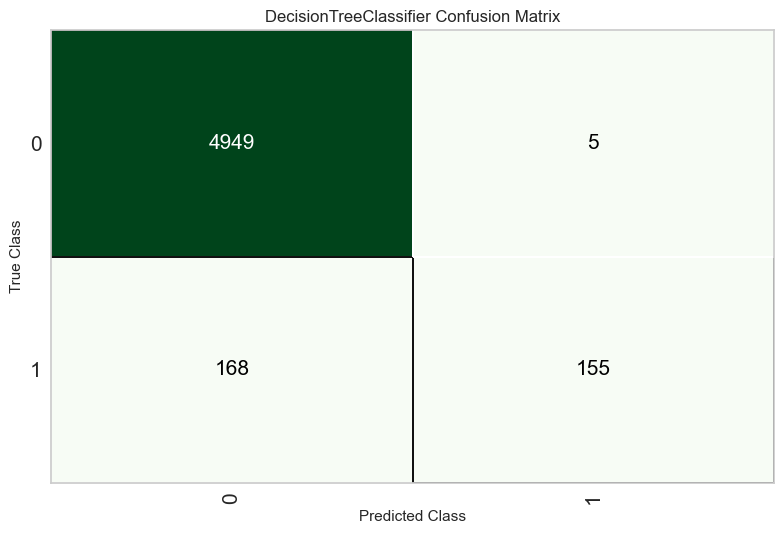

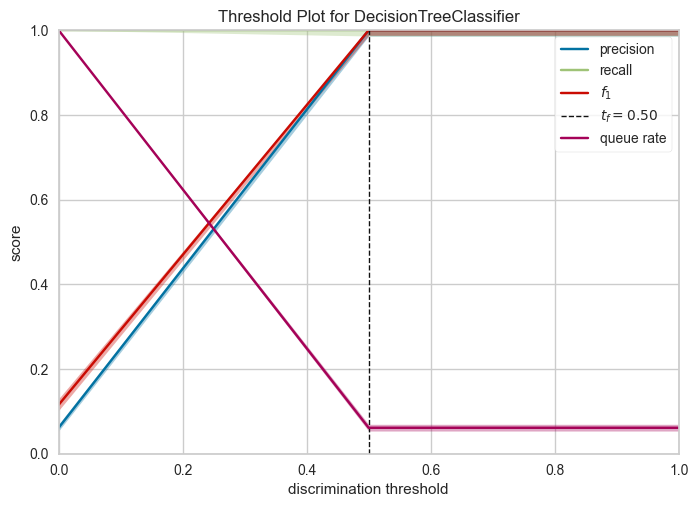

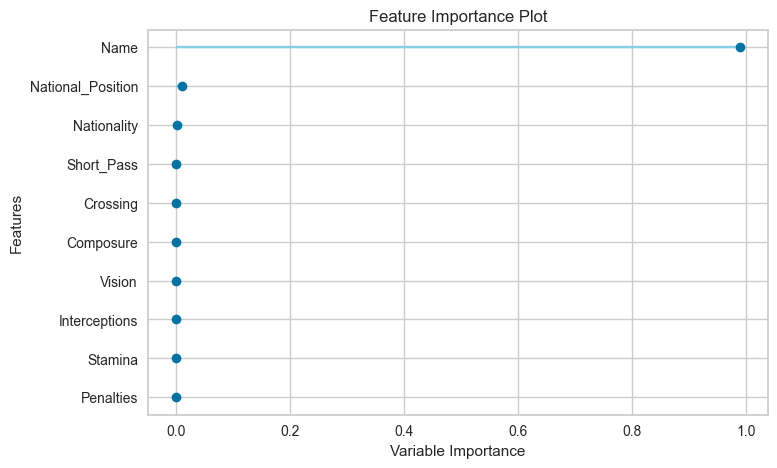

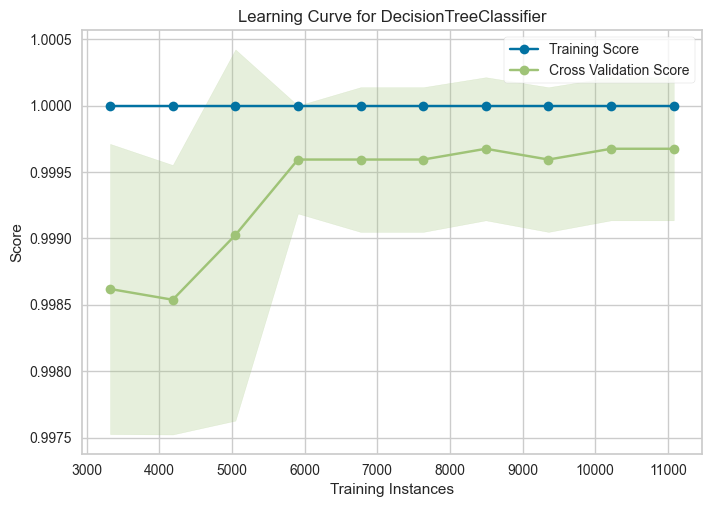

In [107]:
from pycaret.classification import evaluate_model ,plot_model

# Evaluar el modelo utilizando PyCaret
# Matriz de Confusión
plot_model(best_model, plot='confusion_matrix')

# Curva ROC para ajustar el umbral
plot_model(best_model, plot='threshold')

# Importancia de las Características
plot_model(best_model, plot='feature')

# Curva de Aprendizaje
plot_model(best_model, plot='learning')

### 3.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [121]:
from xgboost import XGBClassifier

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42)

# Combinar los conjuntos de entrenamiento y prueba para asegurar consistencia en la codificación one-hot
combined_df = pd.concat([X_train, X_test])

# Codificar características categóricas como variables numéricas
combined_encoded = pd.get_dummies(combined_df)

# Dividir nuevamente los datos en conjuntos de entrenamiento y prueba
X_train_encoded = combined_encoded.iloc[:len(X_train)]
X_test_encoded = combined_encoded.iloc[len(X_train):]

# Entrenar un modelo XGBoost con todas las características disponibles
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_encoded, y_train)

# Evaluar el modelo en el conjunto de prueba
accuracy = xgb_model.score(X_test_encoded, y_test)
print("Accuracy del modelo XGBoost con todas las características:", accuracy)

Accuracy del modelo XGBoost con todas las características: 0.9951677089255259


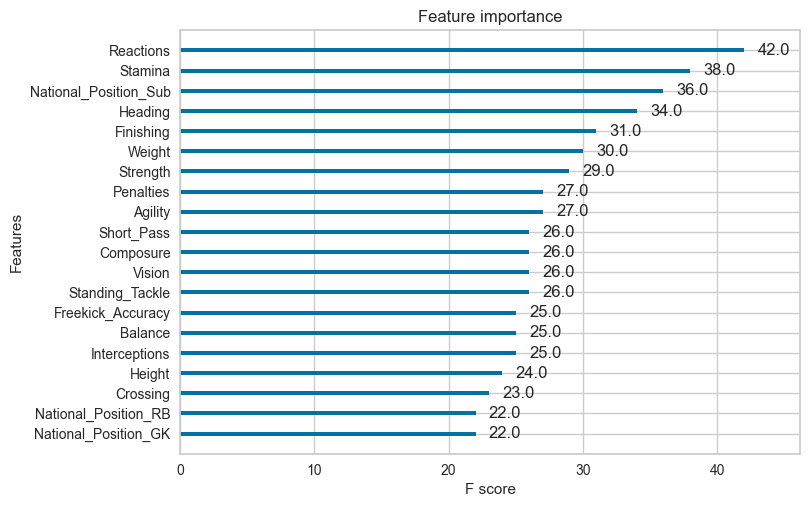

In [110]:
import matplotlib.pyplot as plt

# Mostrar la importancia de las características
xgb.plot_importance(xgb_model, max_num_features=20)
plt.show()

In [111]:
from sklearn.feature_selection import RFE
# Clasificar las características según su importancia
feature_importances = xgb_model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = X_train_encoded.columns[sorted_indices]
# Seleccionar las 50 características más importantes como paso intermedio
n_initial_features = 50
top_features = sorted_features[:n_initial_features]

# Crear subconjunto de datos con las 50 características más importantes
X_train_top_features = X_train_encoded[top_features]
X_test_top_features = X_test_encoded[top_features]

# Ejecutar una búsqueda recursiva de eliminación de características sobre el subconjunto reducido
n_top_features = 10  # Definir el número de características más críticas a seleccionar
rfe = RFE(estimator=XGBClassifier(), n_features_to_select=n_top_features, step=1, verbose=1)
rfe.fit(X_train_top_features, y_train)

# Obtener las características seleccionadas
selected_features = X_train_top_features.columns[rfe.support_]

print("Las", n_top_features, "características más críticas seleccionadas:")
print(selected_features)

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 fe

In [112]:
# Entrenar un nuevo modelo XGBoost con las características seleccionadas
xgb_model_selected_features = XGBClassifier()
xgb_model_selected_features.fit(X_train_top_features[selected_features], y_train)

# Evaluar el modelo con las características seleccionadas en el conjunto de prueba
y_pred = xgb_model_selected_features.predict(X_test_top_features[selected_features])
accuracy_selected_features = accuracy_score(y_test, y_pred)
print("Accuracy del modelo XGBoost con características seleccionadas:", accuracy_selected_features)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

Accuracy del modelo XGBoost con características seleccionadas: 0.9894826606026151
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3289
           1       1.00      0.84      0.91       229

    accuracy                           0.99      3518
   macro avg       0.99      0.92      0.95      3518
weighted avg       0.99      0.99      0.99      3518



In [113]:
# Comparar la precisión del modelo original con el modelo con características seleccionadas
print(f"Accuracy del modelo original: {accuracy}")
print(f"Accuracy del modelo con características seleccionadas: {accuracy_selected_features}")

# Comentar sobre la robustez
print("Reporte de clasificación del modelo original:")
print(classification_report(y_test, xgb_model.predict(X_test_encoded)))
print("Reporte de clasificación del modelo con características seleccionadas:")
print(classification_report(y_test, y_pred))

Accuracy del modelo original: 0.9965889710062535
Accuracy del modelo con características seleccionadas: 0.9894826606026151
Reporte de clasificación del modelo original:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3289
           1       1.00      0.95      0.97       229

    accuracy                           1.00      3518
   macro avg       1.00      0.97      0.99      3518
weighted avg       1.00      1.00      1.00      3518

Reporte de clasificación del modelo con características seleccionadas:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3289
           1       1.00      0.84      0.91       229

    accuracy                           0.99      3518
   macro avg       0.99      0.92      0.95      3518
weighted avg       0.99      0.99      0.99      3518



### 3.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [114]:
from sklearn.metrics import brier_score_loss

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=420)

# Combinar los conjuntos de entrenamiento y prueba para asegurar consistencia en la codificación one-hot
combined_df = pd.concat([X_train, X_test])

# Codificar características categóricas como variables numéricas
combined_encoded = pd.get_dummies(combined_df)

# Dividir nuevamente los datos en conjuntos de entrenamiento y prueba
X_train_encoded = combined_encoded.iloc[:len(X_train)]
X_test_encoded = combined_encoded.iloc[len(X_train):]

# Entrenar un modelo XGBoost con todas las características disponibles
xgb_model = XGBClassifier(random_state=420)
xgb_model.fit(X_train_encoded, y_train)

# Obtener las probabilidades de predicción
y_prob = xgb_model.predict_proba(X_test_encoded)[:, 1]

# Calcular el Brier Score para el modelo sin calibración
brier_score_before = brier_score_loss(y_test, y_prob)
print("Brier Score del modelo sin calibración:", brier_score_before)

Brier Score del modelo sin calibración: 0.0029305737088726504


In [115]:
from sklearn.calibration import CalibratedClassifierCV

# Calibrar el modelo utilizando el método isotónico
calibrated_model = CalibratedClassifierCV(estimator=xgb_model, method='isotonic', cv='prefit')
calibrated_model.fit(X_train_encoded, y_train)

# Obtener las probabilidades de predicción del modelo calibrado
y_prob_calibrated = calibrated_model.predict_proba(X_test_encoded)[:, 1]

# Calcular el Brier Score para el modelo calibrado
brier_score_after = brier_score_loss(y_test, y_prob_calibrated)
print("Brier Score del modelo calibrado:", brier_score_after)

Brier Score del modelo calibrado: 0.002454479250560116


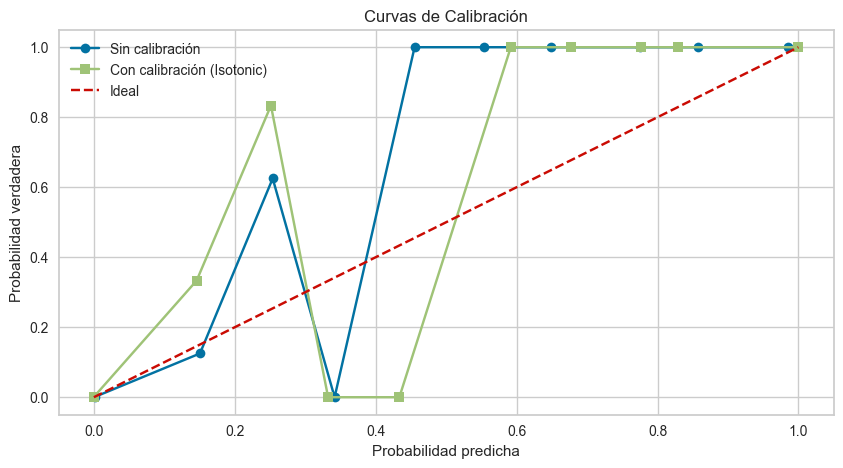


Análisis de los resultados:
1. El Brier Score del modelo sin calibración es 0.0029305737088726504.
2. El Brier Score del modelo calibrado es 0.002454479250560116.
3. La calibración isotónica ha mejorado la precisión de las probabilidades predichas.
4. La gráfica de calibración muestra que las probabilidades del modelo calibrado están más cerca de la línea ideal en comparación con el modelo sin calibración.



In [116]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Calcular las curvas de calibración
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
prob_true_calibrated, prob_pred_calibrated = calibration_curve(y_test, y_prob_calibrated, n_bins=10)

# Crear la gráfica de calibración
plt.figure(figsize=(10, 5))
plt.plot(prob_pred, prob_true, marker='o', label='Sin calibración')
plt.plot(prob_pred_calibrated, prob_true_calibrated, marker='s', label='Con calibración (Isotonic)')
plt.plot([0, 1], [0, 1], linestyle='--', label='Ideal')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Probabilidad verdadera')
plt.title('Curvas de Calibración')
plt.legend()
plt.show()

# Análisis de los resultados
print(f"""
Análisis de los resultados:
1. El Brier Score del modelo sin calibración es {brier_score_before}.
2. El Brier Score del modelo calibrado es {brier_score_after}.
3. La calibración isotónica ha mejorado la precisión de las probabilidades predichas.
4. La gráfica de calibración muestra que las probabilidades del modelo calibrado están más cerca de la línea ideal en comparación con el modelo sin calibración.
""")